In [ ]:
# first we will begin by loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web

#getting past 10 years of data....
start = "2013-01-01"
end = "2024-10-31"

# Downloading the data for CIBC
cibc_data = yf.download("CM.TO", start=start, end=end)
print(cibc_data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open   Volume
Ticker          CM.TO      CM.TO      CM.TO      CM.TO      CM.TO    CM.TO
Date                                                                      
2013-01-02  22.379087  40.060001  40.544998  39.840000  40.450001  1932800
2013-01-03  22.569027  40.400002  40.500000  39.945000  40.125000  2682800
2013-01-04  22.669580  40.580002  40.700001  40.209999  40.209999  1533800
2013-01-07  22.638853  40.525002  40.584999  40.235001  40.580002  1567000
2013-01-08  22.610922  40.474998  40.525002  40.334999  40.480000  2790200


In [ ]:
cibc_data.columns = cibc_data.columns.get_level_values(0)

# Print the cleaned DataFrame
print(cibc_data.head(10))

Price       Adj Close      Close       High        Low       Open   Volume
Date                                                                      
2013-01-02  22.379087  40.060001  40.544998  39.840000  40.450001  1932800
2013-01-03  22.569027  40.400002  40.500000  39.945000  40.125000  2682800
2013-01-04  22.669580  40.580002  40.700001  40.209999  40.209999  1533800
2013-01-07  22.638853  40.525002  40.584999  40.235001  40.580002  1567000
2013-01-08  22.610922  40.474998  40.525002  40.334999  40.480000  2790200
2013-01-09  22.867891  40.935001  40.974998  40.544998  40.595001  2280600
2013-01-10  22.893038  40.980000  41.189999  40.855000  41.000000  1776400
2013-01-11  22.873487  40.945000  41.115002  40.735001  41.009998  1071600
2013-01-14  22.906998  41.005001  41.070000  40.820000  40.915001  1115600
2013-01-15  22.962864  41.105000  41.209999  40.814999  40.845001  1995600


In [ ]:
print(cibc_data.tail(10))

Price       Adj Close      Close       High        Low       Open   Volume
Date                                                                      
2024-10-17  86.449997  86.449997  86.879997  86.000000  86.000000  4165200
2024-10-18  86.480003  86.480003  86.959999  86.180000  86.470001  2701900
2024-10-21  86.309998  86.309998  86.599998  85.910004  86.309998  4775000
2024-10-22  86.379997  86.379997  86.599998  85.860001  85.860001  4044500
2024-10-23  86.830002  86.830002  86.980003  86.110001  86.410004  2702900
2024-10-24  87.349998  87.349998  87.370003  86.699997  86.709999  2120600
2024-10-25  87.320000  87.320000  87.739998  87.019997  87.370003  2047200
2024-10-28  87.949997  87.949997  88.300003  87.160004  87.160004  2843400
2024-10-29  87.949997  87.949997  88.230003  87.610001  87.660004  1830100
2024-10-30  88.040001  88.040001  88.199997  87.500000  87.599998  1497100


In [ ]:
import pandas as pd
# here we will convert column to data time

cibc_data.index = pd.to_datetime(cibc_data.index)


In [ ]:
#handaling an missing values
print(cibc_data.isnull().sum())

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


#As we dont have any missing values we will further process our analysis without any handling missing values...

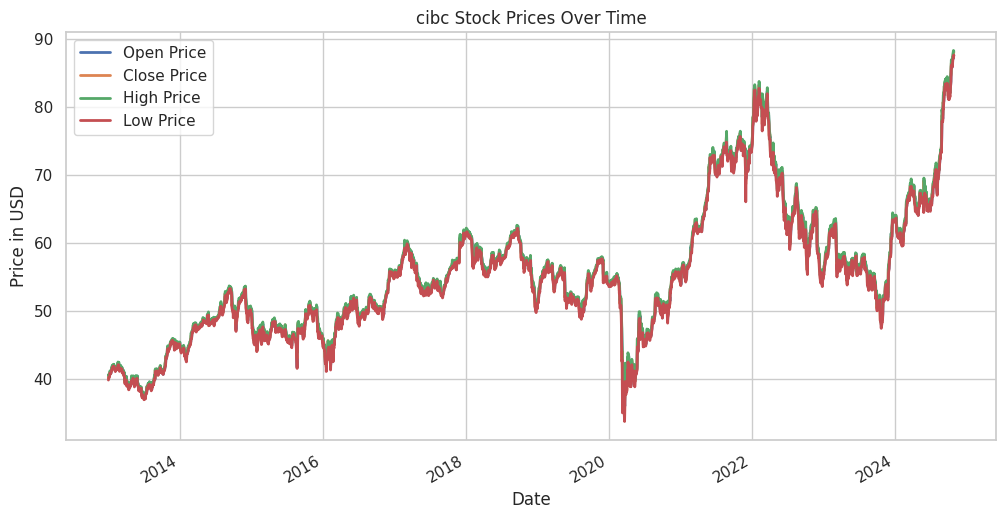

In [ ]:
plt.figure(figsize=(12, 6))
cibc_data ['Open'].plot(label='Open Price', linewidth=2)
cibc_data ['Close'].plot(label='Close Price', linewidth=2)
cibc_data ['High'].plot(label='High Price', linewidth=2)
cibc_data ['Low'].plot(label='Low Price', linewidth=2)
plt.title('cibc Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#getting moving average of 50 days and 200 days
cibc_data['SMA50'] = cibc_data['Close'].rolling(window=50).mean()
cibc_data['SMA200'] = cibc_data['Close'].rolling(window=200).mean()

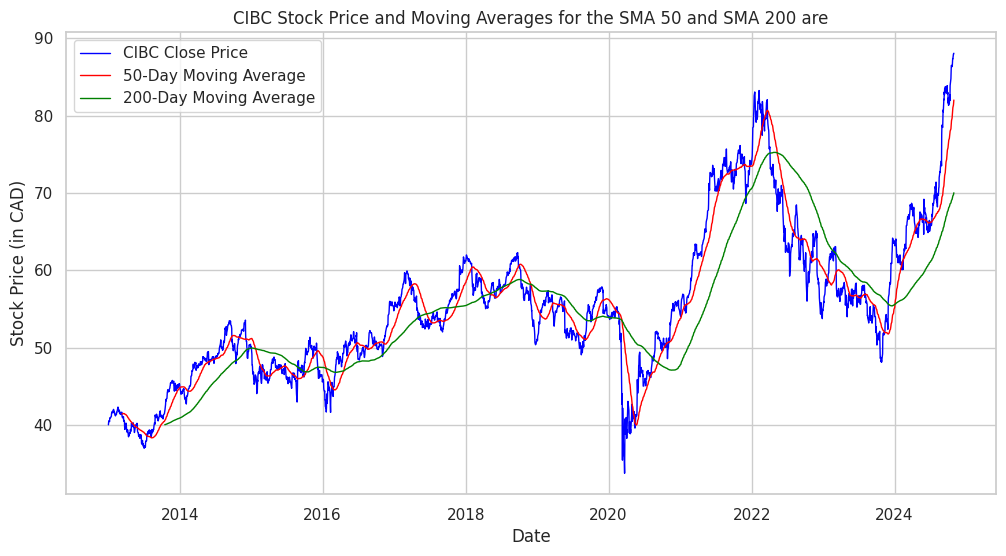

In [ ]:
# Now Plotting the Close price along with SMA50 and SMA200
plt.figure(figsize=(12,6))
plt.plot(cibc_data['Close'], label='CIBC Close Price', color='blue', linewidth=1)
plt.plot(cibc_data['SMA50'], label='50-Day Moving Average', color='red', linewidth=1)
plt.plot(cibc_data['SMA200'], label='200-Day Moving Average', color='green', linewidth=1)

plt.title('CIBC Stock Price and Moving Averages for the SMA 50 and SMA 200 are')
plt.xlabel('Date')
plt.ylabel('Stock Price (in CAD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#now ill be getting the correlation matrix for the cibc stock
# Calculate the correlation matrix
correlation_matrix_cibc = cibc_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

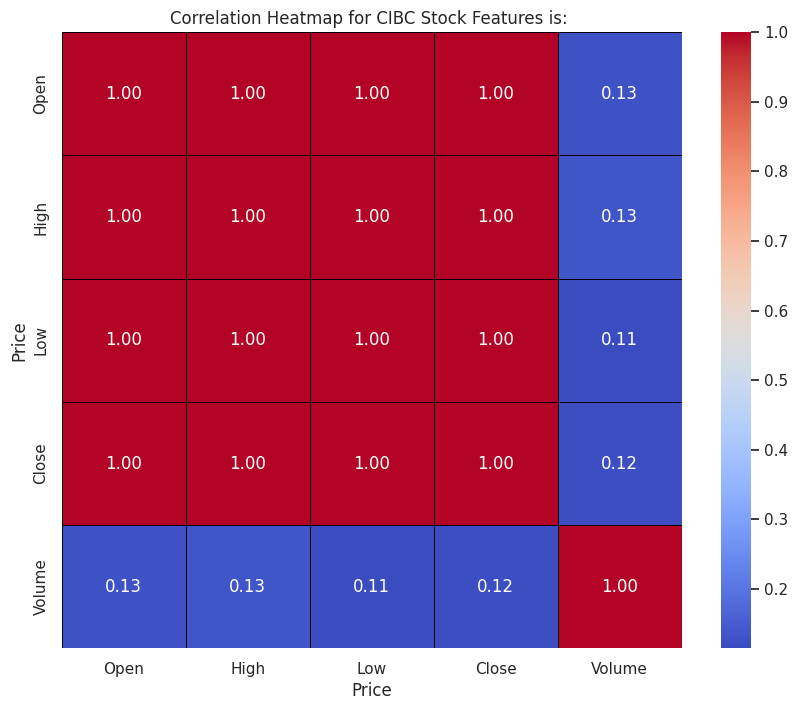

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cibc, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for CIBC Stock Features is: ')
plt.show()

#now we will check the high volatality for the cibc stock price to check on what specifice event the high volume of trading was done

In [ ]:
# Here we will calculate the rolling 20-day standard deviation volatility
cibc_data['Volatility'] = cibc_data['Close'].rolling(window=20).std()

In [ ]:
#now getting the high volatality
volatility_threshold = cibc_data['Volatility'].mean() + 2 * cibc_data['Volatility'].std()

# Identify periods with high volatility
high_volatility = cibc_data[cibc_data['Volatility'] > volatility_threshold]


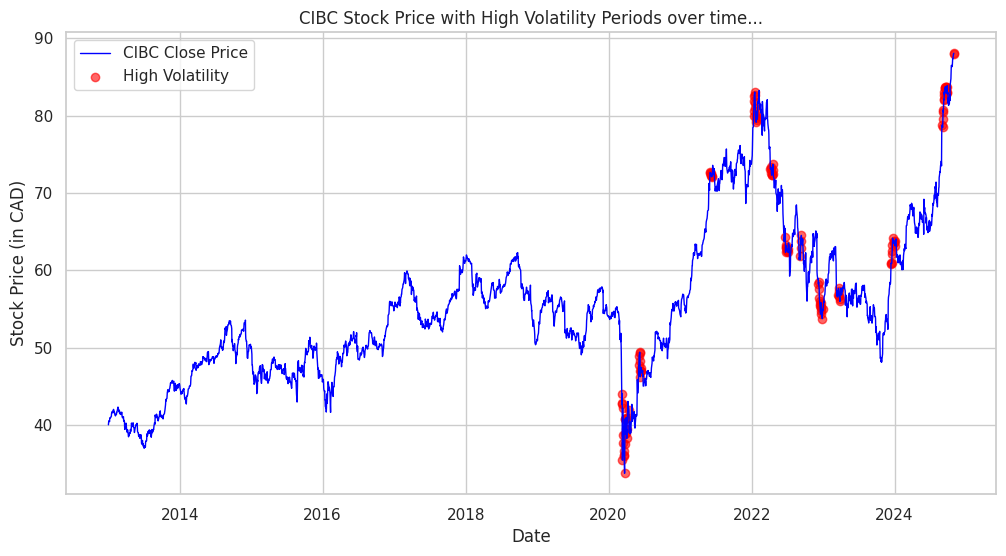

In [ ]:
plt.figure(figsize=(12,6))

# Plotting the close price
plt.plot(cibc_data['Close'], label='CIBC Close Price', color='blue', linewidth=1)

# Highlighting the high volatility periods using a scatter plot graph
plt.scatter(high_volatility.index, high_volatility['Close'], color='red', label='High Volatility', alpha=0.6)

plt.title('CIBC Stock Price with High Volatility Periods over time...')
plt.xlabel('Date')
plt.ylabel('Stock Price (in CAD)')
plt.legend()
plt.grid(True)

plt.show()


#now we will get the support and resistance level from the stock price

In [ ]:
#for that we need to get the average of high, low and close

cibc_data['average'] = (cibc_data['High'] + cibc_data['Low'] + cibc_data['Close']) / 3
cibc_data['Support1'] = 2 * cibc_data['average'] - cibc_data['High']
cibc_data['Resistance1'] = 2 * cibc_data['average'] - cibc_data['Low']
cibc_data['Support2'] = cibc_data['average'] - (cibc_data['High'] - cibc_data['Low'])
cibc_data['Resistance2'] = cibc_data['average'] + (cibc_data['High'] - cibc_data['Low'])
cibc_data['Support3'] = cibc_data['Low'] - 2 * (cibc_data['High'] - cibc_data['average'])
cibc_data['Resistance3'] = cibc_data['High'] + 2 * (cibc_data['average'] - cibc_data['Low'])

# Display the support and resistance levels
print(cibc_data[['average', 'Support1', 'Resistance1', 'Support2', 'Resistance2', 'Support3', 'Resistance3']].head())
print(cibc_data[['average', 'Support1', 'Resistance1', 'Support2', 'Resistance2', 'Support3', 'Resistance3']].tail())

Price         average   Support1  Resistance1   Support2  Resistance2  \
Date                                                                    
2013-01-02  40.148333  39.751668    40.456666  39.443335    40.853331   
2013-01-03  40.281667  40.063334    40.618334  39.726667    40.836667   
2013-01-04  40.496667  40.293334    40.783335  40.006666    40.986669   
2013-01-07  40.448334  40.311668    40.661667  40.098335    40.798332   
2013-01-08  40.445000  40.364998    40.555000  40.254997    40.635002   

Price        Support3  Resistance3  
Date                                
2013-01-02  39.046670    41.161664  
2013-01-03  39.508334    41.173335  
2013-01-04  39.803332    41.273337  
2013-01-07  39.961670    41.011665  
2013-01-08  40.174995    40.745003  
Price         average   Support1  Resistance1   Support2  Resistance2  \
Date                                                                    
2024-10-24  87.139999  86.909996    87.580002  86.469994    87.810005   
2024-10-25

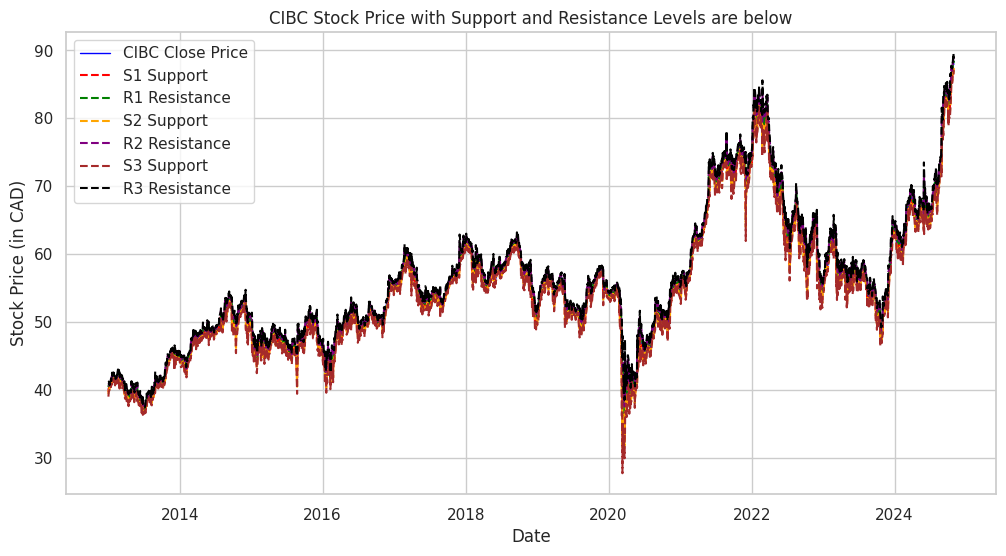

In [ ]:
# Now we will plot support and resistance level for the cibc stock data
plt.figure(figsize=(12, 6))

# Plotting the closing price
plt.plot(cibc_data['Close'], label='CIBC Close Price', color='blue', linewidth=1)

# Plot the support and resistance levels for the cibc stock data
plt.plot(cibc_data['Support1'], label='S1 Support', color='red', linestyle='--')
plt.plot(cibc_data['Resistance1'], label='R1 Resistance', color='green', linestyle='--')
plt.plot(cibc_data['Support2'], label='S2 Support', color='orange', linestyle='--')
plt.plot(cibc_data['Resistance2'], label='R2 Resistance', color='purple', linestyle='--')
plt.plot(cibc_data['Support3'], label='S3 Support', color='brown', linestyle='--')
plt.plot(cibc_data['Resistance3'], label='R3 Resistance', color='black', linestyle='--')

plt.title('CIBC Stock Price with Support and Resistance Levels are below')
plt.xlabel('Date')
plt.ylabel('Stock Price (in CAD)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
print(cibc_data.columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA50',
       'SMA200', 'Volatility', 'average', 'Support1', 'Resistance1',
       'Support2', 'Resistance2', 'Support3', 'Resistance3'],
      dtype='object', name='Price')


In [ ]:
cibc_data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', name='Date', length=2969, freq=None)

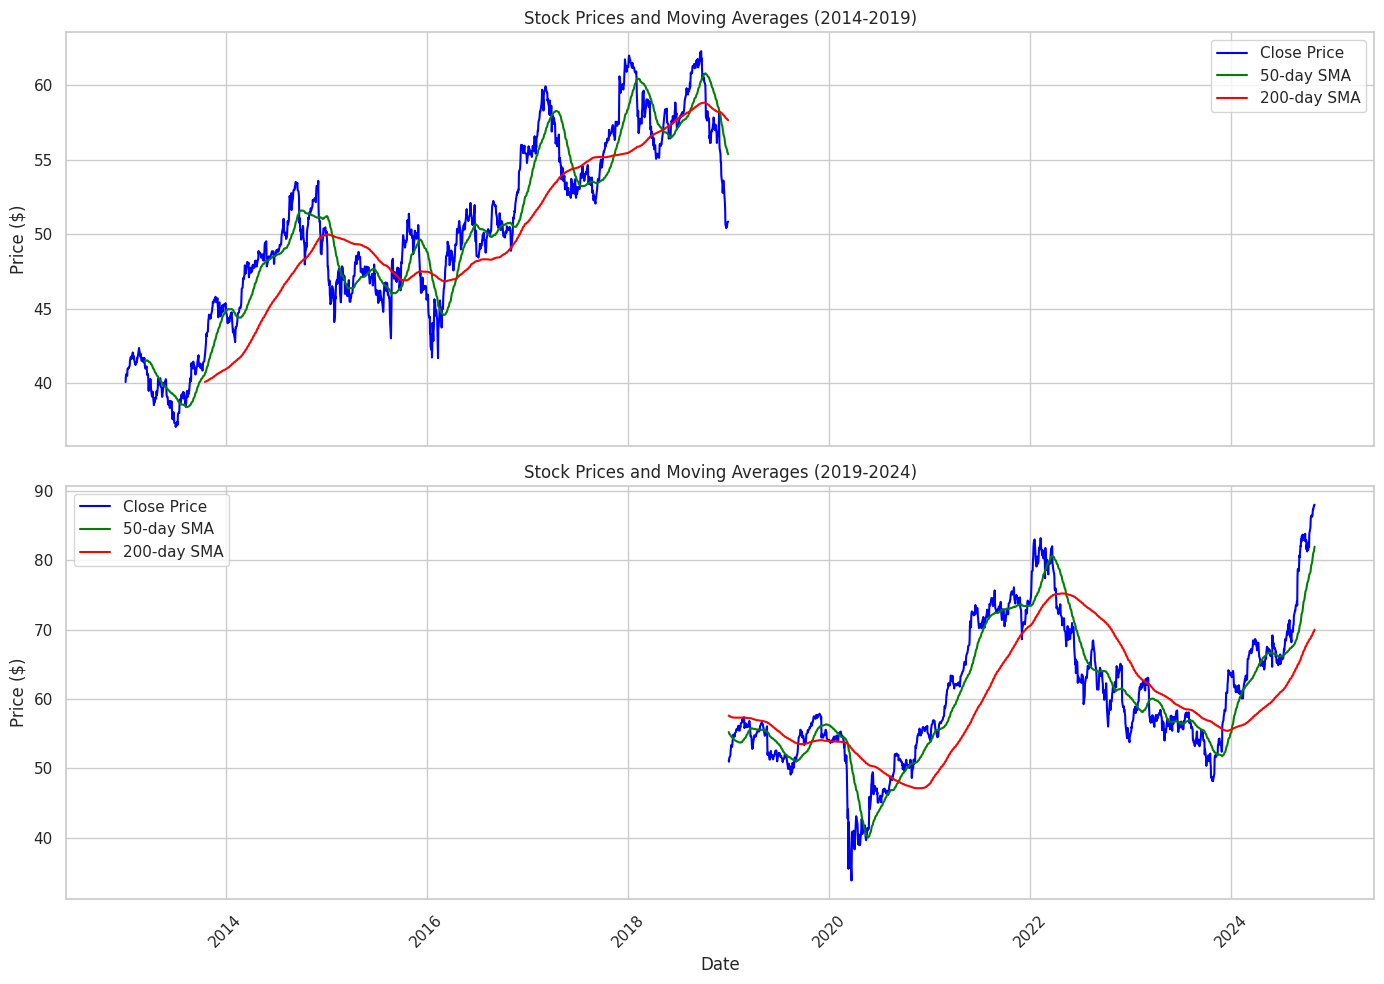

In [ ]:
# Split the data into two periods
data_2014_2019 = cibc_data[cibc_data.index < '2019-01-01']
data_2019_2024 = cibc_data[cibc_data.index >= '2019-01-01']

# Creating a figure and axis for plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the data from 2014 to 2019
axes[0].plot(data_2014_2019.index, data_2014_2019['Close'], label='Close Price', color='blue')
axes[0].plot(data_2014_2019.index, data_2014_2019['SMA50'], label='50-day SMA', color='green')
axes[0].plot(data_2014_2019.index, data_2014_2019['SMA200'], label='200-day SMA', color='red')

axes[0].set_title('Stock Prices and Moving Averages (2014-2019)')
axes[0].set_ylabel('Price ($)')
axes[0].legend(loc='best')

# Plot the data from 2019 to 2024
axes[1].plot(data_2019_2024.index, data_2019_2024['Close'], label='Close Price', color='blue')
axes[1].plot(data_2019_2024.index, data_2019_2024['SMA50'], label='50-day SMA', color='green')
axes[1].plot(data_2019_2024.index, data_2019_2024['SMA200'], label='200-day SMA', color='red')

axes[1].set_title('Stock Prices and Moving Averages (2019-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price ($)')
axes[1].legend(loc='best')

plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

<ipython-input-266-1606380da42b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_2019['20-day MA'] = data_before_2019['Close'].rolling(window=20).mean()


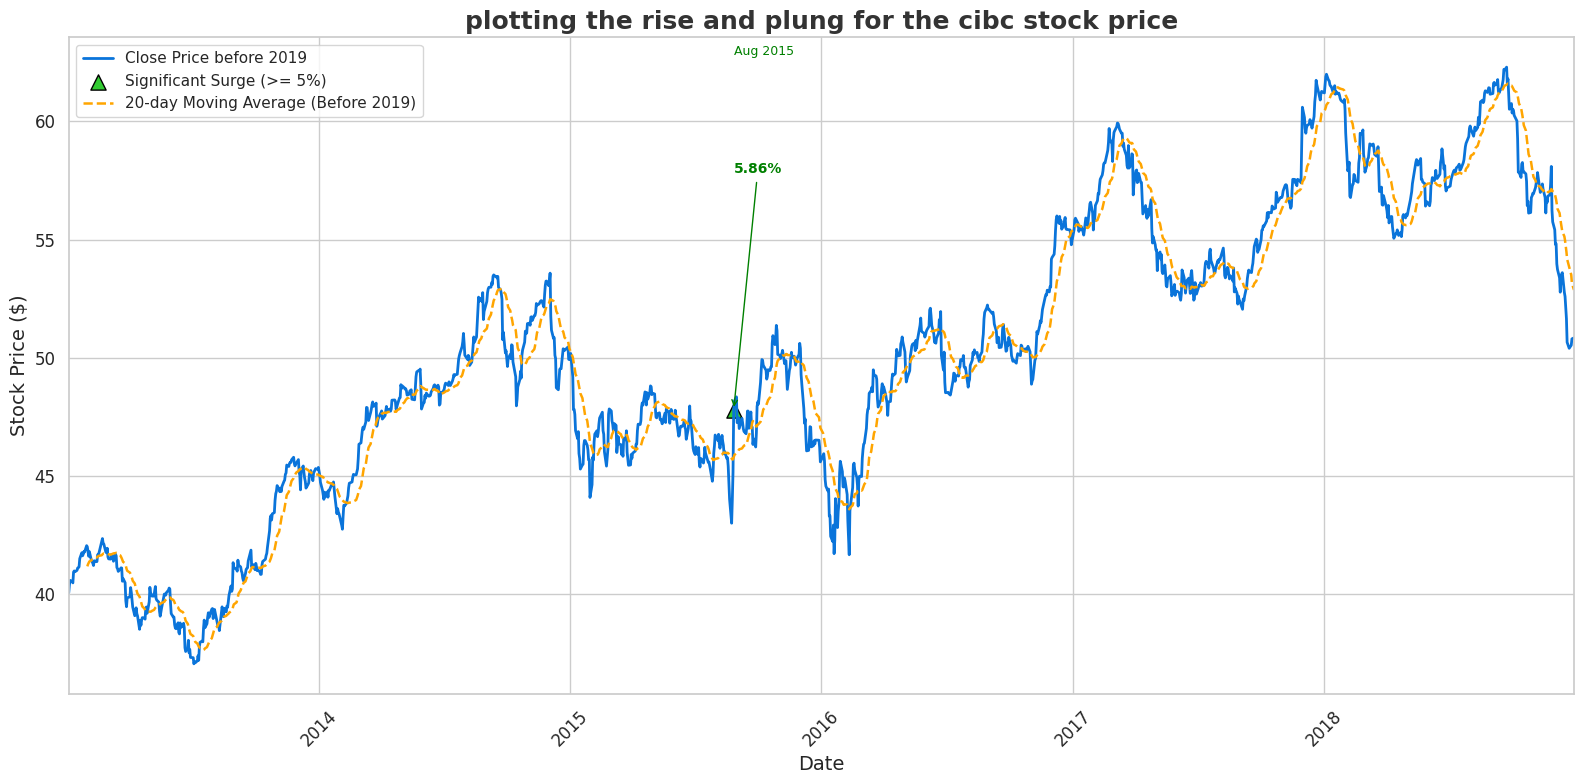

In [ ]:
# getting the data before 2019 year....
cibc_data['Price Change %'] = cibc_data['Close'].pct_change() * 100
data_before_2019 = cibc_data[cibc_data.index < '2019-01-01']

# we will get the spike for more than 5% and less than 5%
spikes_before_2019 = data_before_2019[data_before_2019['Close'].pct_change() >= 0.05]
drops_before_2019 = data_before_2019[data_before_2019['Close'].pct_change() <= -0.05]

plt.figure(figsize=(16, 8))

sns.lineplot(data=data_before_2019, x=data_before_2019.index, y='Close', label='Close Price before 2019', linewidth=2, color='#0A74DA')

# Mark spikes and drops
if not spikes_before_2019.empty:
    plt.scatter(spikes_before_2019.index, spikes_before_2019['Close'], color='#33CC33', edgecolor='black', label='Significant Surge (>= 5%)', marker='^', s=120)

    # here we will anotate increasing percentage and month to the graph
    for index, row in spikes_before_2019.iterrows():
        plt.annotate(f"{row['Price Change %']:.2f}%",xy=(row.name, row['Close']), xytext=(row.name, row['Close'] + 10), textcoords='data', arrowprops=dict(arrowstyle="->", color='green'),fontsize=10, color='green', weight='bold')
        plt.annotate(f"{row.name.strftime('%b %Y')}", xy=(row.name, row['Close']),  xytext=(row.name, row['Close'] + 15),textcoords='data', fontsize=9, color='green')

if not drops_before_2019.empty:
    plt.scatter(drops_before_2019.index, drops_before_2019['Close'], color='#FF3333', edgecolor='black', label='Significant Drop (<= -5%)', marker='v', s=120)

    # Annotating the drop percentage and the month in the graph
    for index, row in drops_before_2019.iterrows():
        plt.annotate(f"{row['Price Change %']:.2f}%", xy=(row.name, row['Close']), xytext=(row.name, row['Close'] - 10),   textcoords='data', arrowprops=dict(arrowstyle="->", color='red'), fontsize=10, color='red', weight='bold')
        plt.annotate(f"{row.name.strftime('%b %Y')}", xy=(row.name, row['Close']),  xytext=(row.name, row['Close'] - 15),textcoords='data', fontsize=9, color='red')

data_before_2019['20-day MA'] = data_before_2019['Close'].rolling(window=20).mean()
sns.lineplot(data=data_before_2019, x=data_before_2019.index, y='20-day MA', label='20-day Moving Average (Before 2019)', linestyle='--', color='#FFA500', linewidth=1.8)

#here we will plot the graph

plt.title('plotting the rise and plung for the cibc stock price', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.tick_params(axis='x', rotation=45, labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# now here we will limit our graph means x-axis upto 2019
plt.xlim([data_before_2019.index.min(), data_before_2019.index.max()])
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-267-984678c6820a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2019['20-day MA'] = data_after_2019['Close'].rolling(window=20).mean()


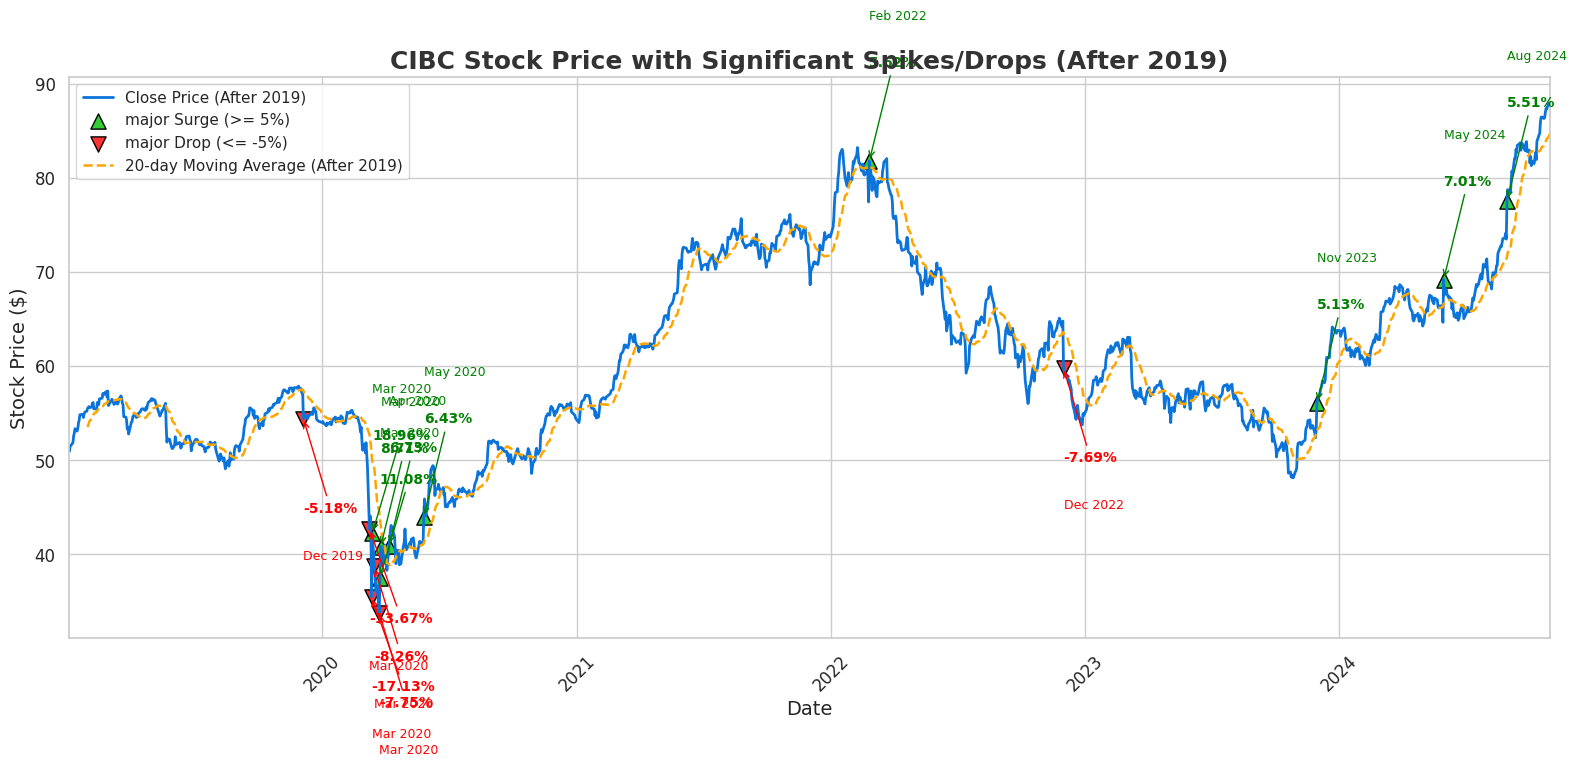

In [ ]:
cibc_data['Price Change %'] = cibc_data['Close'].pct_change() * 100

#first we will get the data after 2019 year
data_after_2019 = cibc_data[cibc_data.index >= '2019-01-01']

#then we will set the hike and plung notation for more 5% and less than 5%, we will use 5% only because cibc stock not usuallt fluctualte
spikes_after_2019 = data_after_2019[data_after_2019['Close'].pct_change() >= 0.05]
drops_after_2019 = data_after_2019[data_after_2019['Close'].pct_change() <= -0.05]

# Plotting the graph after after 2019
plt.figure(figsize=(16, 8))

# now here we will plot the closing price
sns.lineplot(data=data_after_2019, x=data_after_2019.index, y='Close', label='Close Price (After 2019)', linewidth=2, color='#0A74DA')

# Marking surge and plung
if not spikes_after_2019.empty:
    plt.scatter(spikes_after_2019.index, spikes_after_2019['Close'], color='#33CC33', edgecolor='black', label='major Surge (>= 5%)', marker='^', s=120)

    # then we will annotate the major spike using annotate features
    for index, row in spikes_after_2019.iterrows():
        plt.annotate(f"{row['Price Change %']:.2f}%", xy=(row.name, row['Close']), xytext=(row.name, row['Close'] + 10), textcoords='data', arrowprops=dict(arrowstyle="->", color='green'), fontsize=10, color='green', weight='bold')
        plt.annotate(f"{row.name.strftime('%b %Y')}", xy=(row.name, row['Close']),xytext=(row.name, row['Close'] + 15),textcoords='data', fontsize=9, color='green')

if not drops_after_2019.empty:
    plt.scatter(drops_after_2019.index, drops_after_2019['Close'], color='#FF3333', edgecolor='black', label='major Drop (<= -5%)', marker='v', s=120)

    # here we will annotate percentage drops and corresponding months for the drops
    for index, row in drops_after_2019.iterrows():
        plt.annotate(f"{row['Price Change %']:.2f}%", xy=(row.name, row['Close']), xytext=(row.name, row['Close'] - 10),  textcoords='data', arrowprops=dict(arrowstyle="->", color='red'),fontsize=10, color='red', weight='bold')
        plt.annotate(f"{row.name.strftime('%b %Y')}",xy=(row.name, row['Close']),xytext=(row.name, row['Close'] - 15), textcoords='data', fontsize=9, color='red')


data_after_2019['20-day MA'] = data_after_2019['Close'].rolling(window=20).mean()
sns.lineplot(data=data_after_2019, x=data_after_2019.index, y='20-day MA', label='20-day Moving Average (After 2019)', linestyle='--', color='#FFA500', linewidth=1.8)

plt.title('CIBC Stock Price with Significant Spikes/Drops (After 2019)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.tick_params(axis='x', rotation=45, labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlim([data_after_2019.index.min(), data_after_2019.index.max()])


plt.tight_layout()
plt.show()


#Now implementing LSTM and ARIMA model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(cibc_data[['Close']])

In [ ]:
print(cibc_data)

Price       Adj Close      Close       High        Low       Open   Volume  \
Date                                                                         
2013-01-02  22.379087  40.060001  40.544998  39.840000  40.450001  1932800   
2013-01-03  22.569027  40.400002  40.500000  39.945000  40.125000  2682800   
2013-01-04  22.669580  40.580002  40.700001  40.209999  40.209999  1533800   
2013-01-07  22.638853  40.525002  40.584999  40.235001  40.580002  1567000   
2013-01-08  22.610922  40.474998  40.525002  40.334999  40.480000  2790200   
...               ...        ...        ...        ...        ...      ...   
2024-10-24  87.349998  87.349998  87.370003  86.699997  86.709999  2120600   
2024-10-25  87.320000  87.320000  87.739998  87.019997  87.370003  2047200   
2024-10-28  87.949997  87.949997  88.300003  87.160004  87.160004  2843400   
2024-10-29  87.949997  87.949997  88.230003  87.610001  87.660004  1830100   
2024-10-30  88.040001  88.040001  88.199997  87.500000  87.59999

In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
       # here we will take past 60 day of closing price
        X.append(data[i-time_step:i, 0])
        # Current day price
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# now to make ready the code we will divide the data in to training and testing
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

#then we will create a new varible for training and testing
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Now creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training out the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0378 - val_loss: 0.0015
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 9.3562e-04 - val_loss: 0.0014
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 8.1195e-04 - val_loss: 0.0014
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 6.6493e-04 - val_loss: 0.0013
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 6.2869e-04 - val_loss: 0.0011
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 5.7925e-04 - val_loss: 9.3418e-04
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 6.0165e-04 - val_loss: 8.5749e-04
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 4.0847e-04 - val_loss: 8.1899e-04
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 4.2516e-04 - val_loss: 8.8636e-04
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 4.5607e-04 - val_loss: 6.8198e-04


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


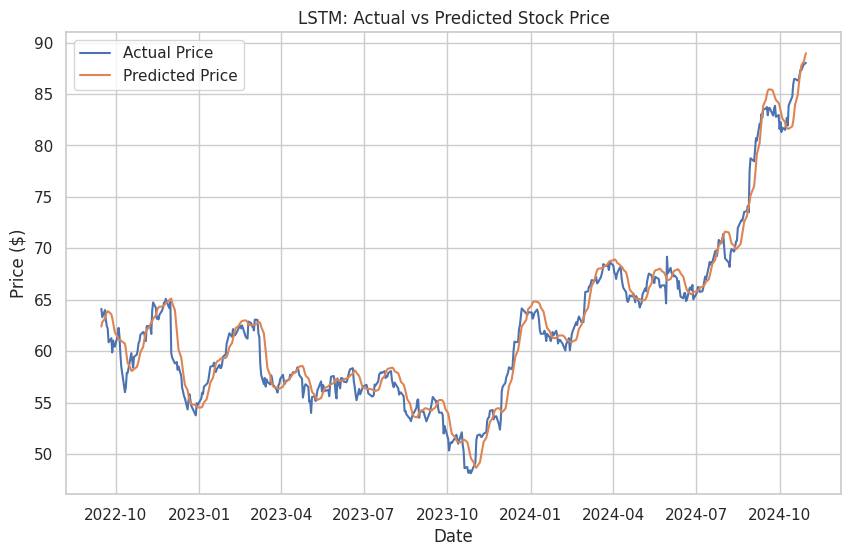

In [ ]:
# Make predictions for the test data
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cibc_data.index[train_size+60:], y_test_actual, label='Actual Price')
plt.plot(cibc_data.index[train_size+60:], predicted_stock_price, label='Predicted Price')
plt.title('LSTM: Actual vs Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


ARIMA Model Training

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(cibc_data['Close'], order=(5, 0, 0))  # Use (p, d=0, q)
model_arima_fit = model_arima.fit()

# Print model summary
print(model_arima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2969
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2770.523
Date:                Mon, 09 Dec 2024   AIC                           5555.046
Time:                        04:17:03   BIC                           5597.017
Sample:                             0   HQIC                          5570.151
                               - 2969                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.2913     11.409      4.846      0.000      32.931      77.652
ar.L1          0.9972      0.009    110.257      0.000       0.979       1.015
ar.L2          0.0313      0.012      2.611      0.0

In [ ]:
# now we will forecast uisng ARIMA model for next 6 month
forecast_arima = model_arima_fit.forecast(steps=180)

# Create a date index for forecast
forecast_dates = pd.date_range(start=cibc_data.index[-1], periods=181, freq='B')[1:]
forecast_arima.index = forecast_dates


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


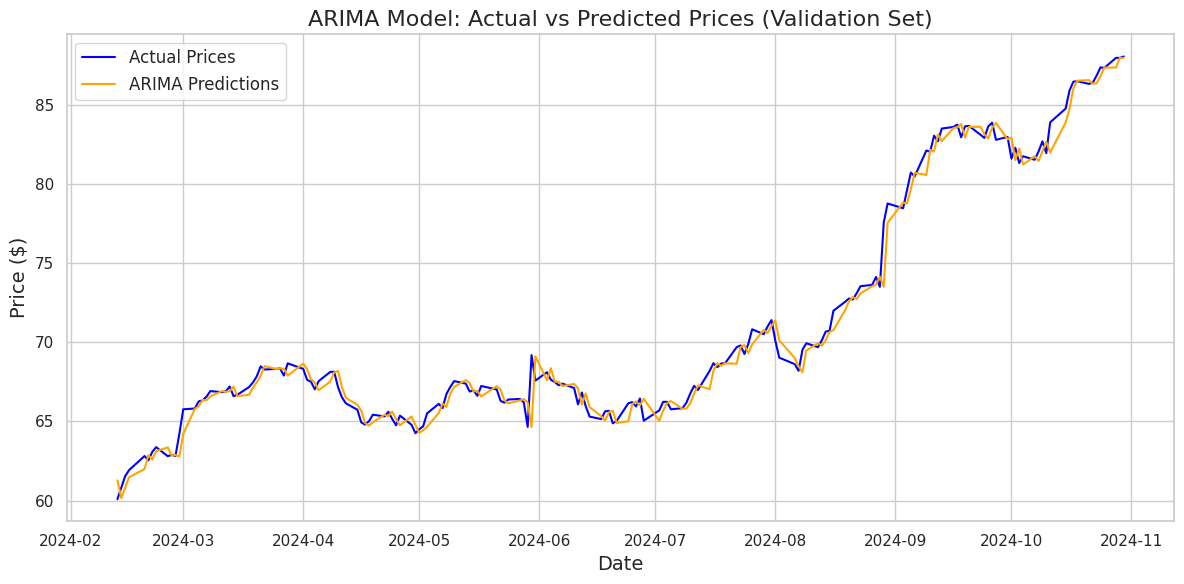

In [ ]:
# Ensureing that the dataset index is in a DatetimeIndex
if not isinstance(cibc_data.index, pd.DatetimeIndex):
    cibc_data.index = pd.to_datetime(cibc_data.index)

# Define validation set
validation_set = cibc_data['Close'][-validation_steps:]

# Now we will forecast for the validation set using ARIMA
forecast_arima_validation = model_arima_fit.get_prediction(start=validation_set.index[0], end=validation_set.index[-1])

# Extracting the forecasted mean values
forecast_arima_validation_mean = forecast_arima_validation.predicted_mean

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(validation_set, label='Actual Prices', color='blue')

# Now we will Plot ARIMA predictions
plt.plot(validation_set.index, forecast_arima_validation_mean, label='ARIMA Predictions', color='orange')

plt.title('ARIMA Model: Actual vs Predicted Prices (Validation Set)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Showing the plot
plt.tight_layout()
plt.show()


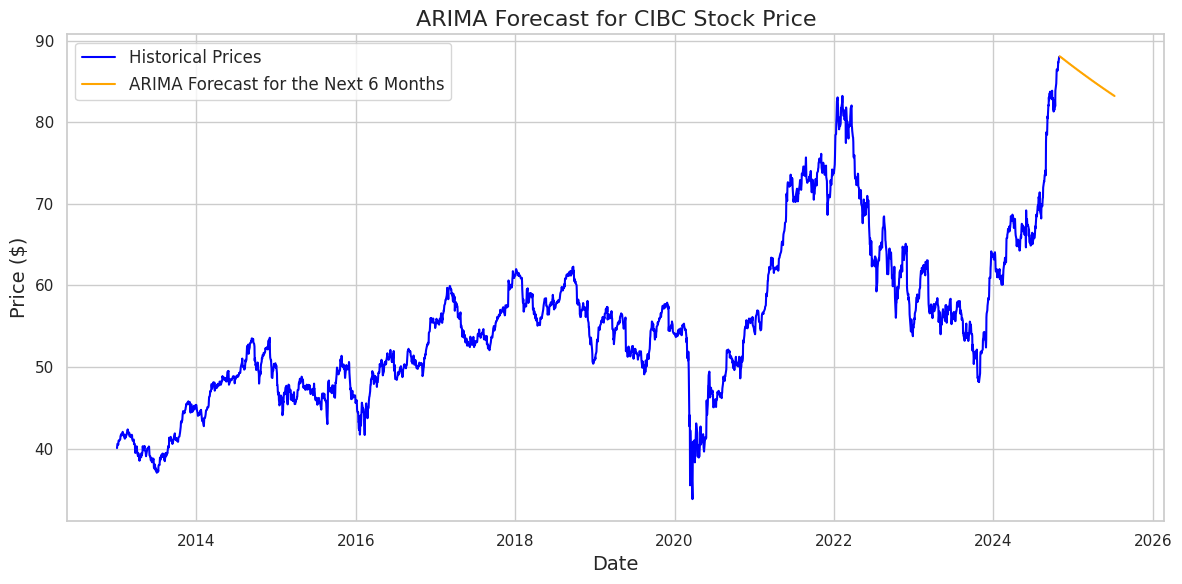

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(cibc_data['Close'], label='Historical Prices', color='blue')

# Then here we will plot the forcasted arima model
plt.plot(forecast_arima, label='ARIMA Forecast for the Next 6 Months', color='orange')

plt.title('ARIMA Forecast for CIBC Stock Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# At the end we will calculate the performance of the metrics
mse = mean_squared_error(validation_set, forecast_arima_validation_mean)
mae = mean_absolute_error(validation_set, forecast_arima_validation_mean)
mape = np.mean(np.abs((validation_set - forecast_arima_validation_mean) / validation_set)) * 100

print("ARIMA Model Performance for Validation Set is:")
print("Mean Squared Error is :",mse)
print("Mean Absolute Error is:",mae)
print("Mean Absolute Percentage Error is:", mape)

ARIMA Model Performance for Validation Set is:
Mean Squared Error is : 0.5989946492338756
Mean Absolute Error is: 0.5410599490859949
Mean Absolute Percentage Error is: 0.7636895636435502
